In [51]:
from scipy.fft import fft, ifft, fftfreq
from scipy import signal

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from src.data_loader import load_training_data
from src.preprocessing import notch_filter, bandpass_filter, highpass_filter
import config

In [80]:
def plot_PSD(x, fs):
    f, Pxx_den = signal.periodogram(x, fs)
    plt.semilogy(f, Pxx_den)
    plt.xlim(0,40)
    plt.ylim(10**(-20), 10**(-8))
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()

In [10]:
def plot_fft(signal, fs):
    # Number of sample points
    N = len(signal)
    # sample spacing
    T = 1/fs
    yf = fft(signal)
    xf = fftfreq(N, T)[:N//2]
    import matplotlib.pyplot as plt
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    plt.show()

In [5]:
edf_file = "../data/training/R1.edf"
xml_file = "../data/training/R1.xml"
multi_channel_data, labels, info = load_training_data(
            edf_file, xml_file
        )

Loading training data from ../data/training/R1.edf and ../data/training/R1.xml...


c:\Users\Ines\Documents\2025\KTH\Studies\Signal Processing and Data Analysis\Project\CM2013\Python\src\data_loader.py:56: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True, verbose=False)


Identified channels:
  EEG: ['EEG(sec)', 'EEG']
  EOG: ['EOG(L)', 'EOG(R)']
  EMG: ['EMG']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  EEG: 2 channels, 3750 samples/epoch, 125.0 Hz
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  EOG: 2 channels, 3750 samples/epoch, 125.0 Hz
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
  EMG: 1 channels, 3750 samples/epoch, 125.0 Hz

Loaded 1083 epochs (9.03 hours)
Sleep stage distribution:
  Wake: 333 epochs (30.7%)
  N1: 47 epochs (4.3%)
  N2: 457 epochs (42.2%)
  N3: 145 epochs (13.4%)
  REM: 102 epochs (9.4%)


In [6]:
data_1 = multi_channel_data["eeg"][0][0]
data_2 = multi_channel_data["eeg"][0][1]

In [27]:
fs = 125
data = np.sin(2 * np.pi * 5 * np.arange(0, 10, 1/fs)) 

In [32]:
fs * 5

625

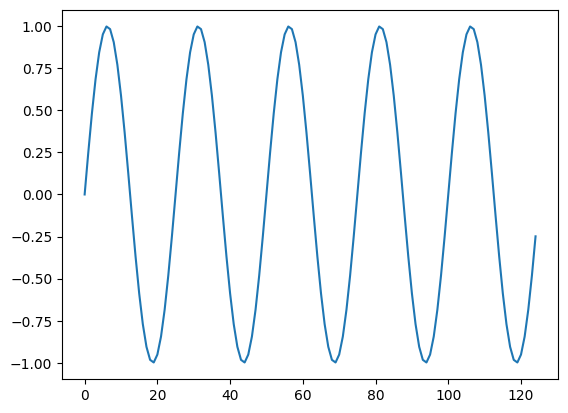

In [33]:
plt.plot(data[0:125])

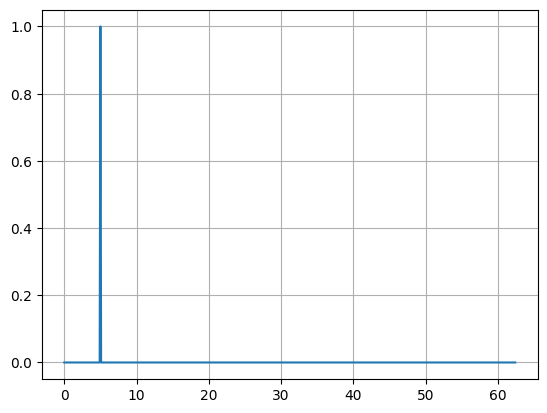

In [28]:
plot_fft(data, 125)

In [71]:
eeg_data = multi_channel_data["eeg"]
preprocessed_eeg = np.zeros_like(multi_channel_data["eeg"])
sig = data_2

In [94]:
flattened_data = eeg_data[:,1,:].flatten()

In [95]:
# Apply EEG-specific preprocessing
filtered_signal = highpass_filter(flattened_data,0.3,125,order=5)
filtered_signal = notch_filter(filtered_signal, config.NOTCH_FILTER_FREQ, config.NOTCH_FILTER_Q, 125)
filtered_signal = bandpass_filter(filtered_signal, config.BANDPASS_FILTER_LOWER_FREQ, 32, 125, config.BANDPASS_FILTER_ORDER)

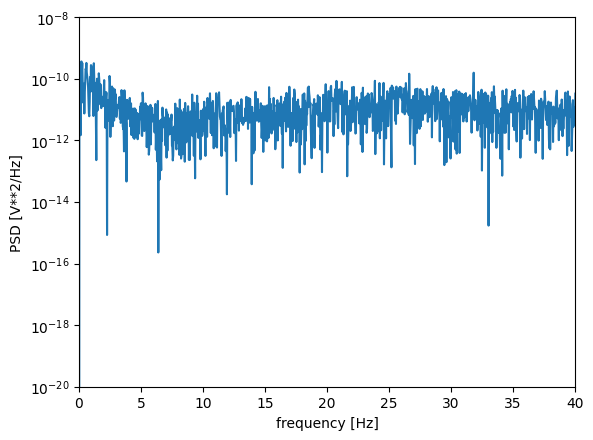

In [81]:
plot_PSD(data_2,125)

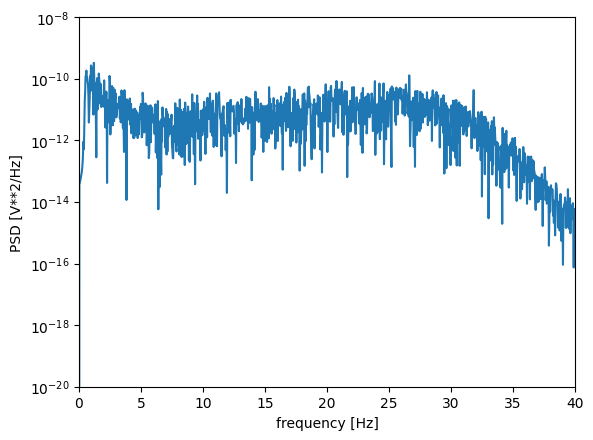

In [82]:
plot_PSD(filtered_signal,125)

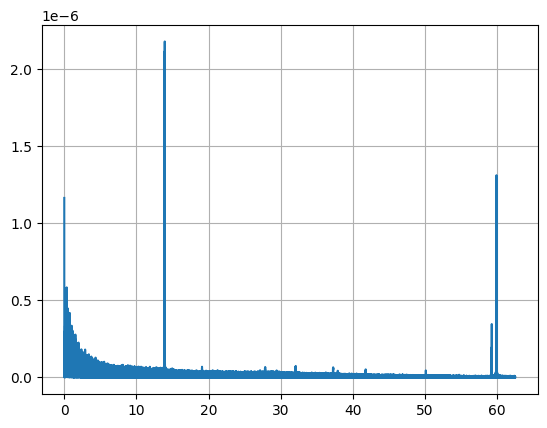

In [96]:
plot_fft(flattened_data, fs = 125)

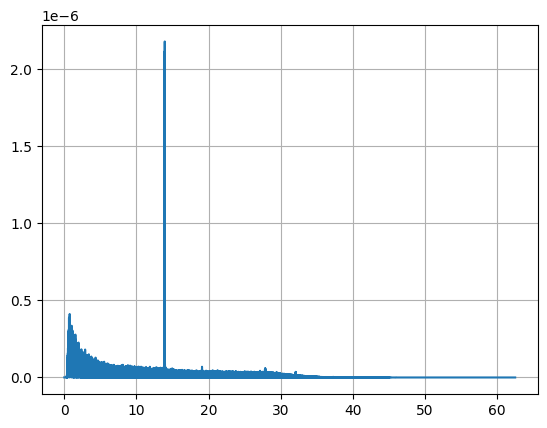

In [97]:
plot_fft(filtered_signal, fs = 125)

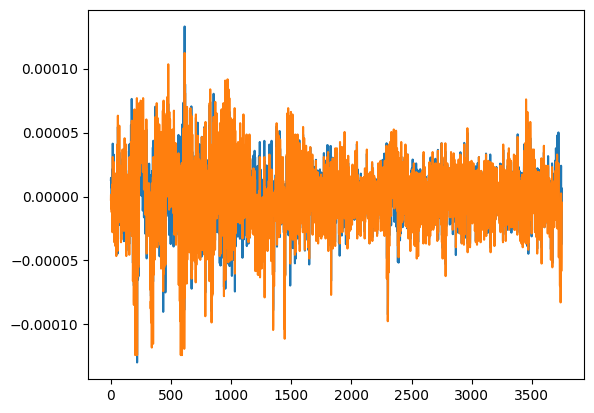

In [65]:
plt.plot(filtered_signal)
plt.plot(data_2)

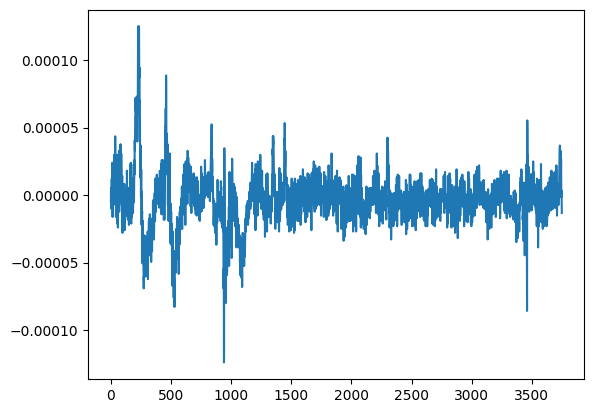

In [13]:
plt.plot(data_1)

In [10]:
T = 1/125

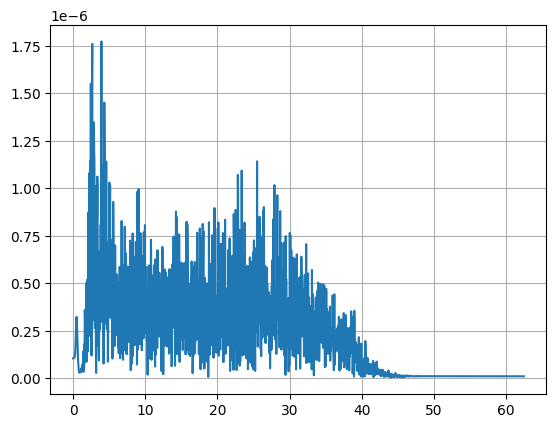

In [12]:
N = len(filtered_signal)

y_filtered = fft(filtered_signal)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(y_filtered[0:N//2]))
plt.grid()
plt.show()